# Método de Monte Carlo para propagación de errores





---



Supongamos que tenemos un cilindro de un material cuya densidad queremos determinar indirectamente a partir de su volumen (dimensiones geometricas) y su masa.

Realizamos mediciones directas de esas cantidades y obtenemos lo siguiente:






|              | valor medido | incerteza asociada |
|--------------|--------------|--------------------|
| diametro (d) | 3.2 cm       | 0.1 cm             |
| espesor (h)  | 0.6 cm       | 0.1 cm             |
| masa (m)     | 45.4 g     | 0.1 g              |


Sabemos que la densidad $\rho$ está vinculada con el resto de los parámetros a través de la relación:

$$
\rho = \frac{m}{V} = \frac{m}{\pi \left(d/2 \right)^2 h} = \frac{4m}{\pi d^2 h}.
$$

Es decir que la densidad, como cantidad fisica medida indirectamente, depende en principio de 3 magnitudes: la masa $m$, el diametro $d$ y la altura $h$ [Es cierto esto?]. Es decir que tenemos:

$$
\rho = \rho(m, h, d).
$$

Lo que veremos a continuación es un método numerico para determinar la incerteza asociada a la densidad, magnitud que estamos midiendo **indirectamente**. Es decir, este método es una forma de propagación de errores **alternativa** a la que vimos precedentemente en clase. Mas adelante discutiremos las posibles ventajas y desventajas relativas de este método.






---



Comenzamos por cargar los paquetes necesarios

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Definimos los valores medidos y sus dispersiones en variables:

In [97]:
d = 3.2
h = 0.6
m = 45.4

sigma_d = 0.1 
sigma_h = 0.1
sigma_m = 0.1

Podemos calcular un mejor estimado para el volumen (en g/cm3):

In [107]:
vol = np.pi*(d/2)**2*h

print(vol)

4.825486315913922


## Calculemoslo primero por la via que conocemos

La propagacion de errores que podriamos llamar 'estandar' nos dice que la desviacion estandar de $\rho$ se puede calcular como




$
\sigma_\rho = 
\sqrt{ \left( \frac{\partial \rho}{\partial m } \right)^2_{\overline{m},\overline{h},\overline{d}} \sigma_{m}^2 + \left( \frac{\partial \rho}{\partial h} \right)^2_{\overline{m},\overline{h},\overline{d}} \sigma_{h}^2 + \left( \frac{\partial \rho}{\partial d} \right)^2_{\overline{m},\overline{h},\overline{d}} \sigma_{d}^2 
}
$

Calculemos cada sumando dentro de la raiz y luego el total. Las derivadas que tenemos que calcular son:

\begin{align}
\frac{\partial \rho}{\partial m} &= \frac{4}{\pi d^2 h} \\
\frac{\partial \rho}{\partial h} &= -\frac{4m}{\pi d^2 h^2} \\
\frac{\partial \rho}{\partial d} &= -\frac{8m}{\pi d^3 h} 
\end{align}

In [99]:
sigma_rho_m = (4/np.pi/d**2/h)**2*sigma_m**2

sigma_rho_h = (4*m/np.pi/d**2/h**2)**2*sigma_h**2

sigma_rho_d = (8*m/np.pi/d**3/h)**2*sigma_d**2

sigma_rho_propagacion_metodo_estandar = np.sqrt( sigma_rho_m + sigma_rho_h + sigma_rho_d )

In [100]:
print(sigma_rho_propagacion_metodo_estandar)

1.6748202583914529


## Consideremos ahora el Método de Monte Carlo

In [101]:
N = int(10000)

d_mc = d + sigma_d*np.random.randn(N)

h_mc = h + sigma_h*np.random.randn(N)

m_mc = m + sigma_m*np.random.randn(N)

Veamos las distribuciones de datos que creamos:

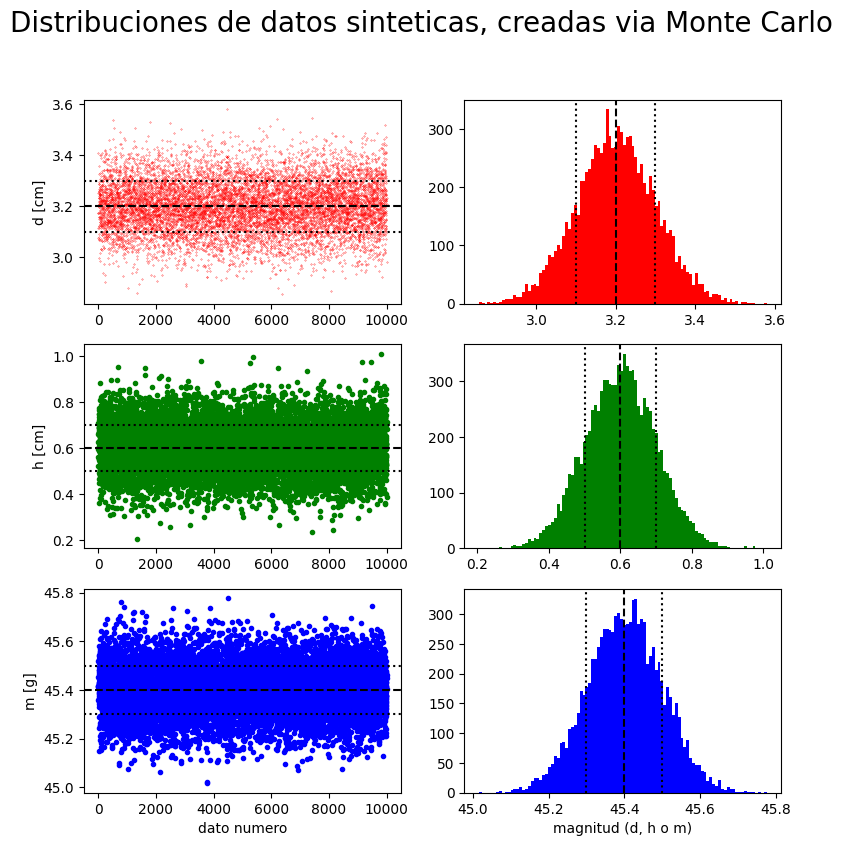

In [102]:
Nbins = 100

fig, ax = plt.subplots(3, 2, figsize=(9,9));
fig.suptitle('Distribuciones de datos sinteticas, creadas via Monte Carlo', fontsize=20)

ax[0, 0].plot(d_mc, 'r.', markersize=0.5);
ax[0, 0].axhline(d, color='k', linestyle='--');
ax[0, 0].axhline(d-sigma_d, color='k', linestyle=':');
ax[0, 0].axhline(d+sigma_d, color='k', linestyle=':');
ax[0, 0].set_ylabel('d [cm]');

ax[0, 1].hist(d_mc, bins=Nbins, color='r');
ax[0, 1].axvline(np.mean(d_mc), color='k', linestyle='--');
ax[0, 1].axvline(d-sigma_d, color='k', linestyle=':');
ax[0, 1].axvline(d+sigma_d, color='k', linestyle=':');

ax[1, 0].plot(h_mc, 'g.');
ax[1, 0].axhline(h, color='k', linestyle='--');
ax[1, 0].axhline(h-sigma_h, color='k', linestyle=':');
ax[1, 0].axhline(h+sigma_h, color='k', linestyle=':');
ax[1, 0].set_ylabel('h [cm]');

ax[1, 1].hist(h_mc, bins=Nbins, color='g');
ax[1, 1].axvline(h, color='k', linestyle='--');
ax[1, 1].axvline(h-sigma_h, color='k', linestyle=':');
ax[1, 1].axvline(h+sigma_h, color='k', linestyle=':');

ax[2, 0].plot(m_mc, 'b.');
ax[2, 0].axhline(m, color='k', linestyle='--');
ax[2, 0].axhline(m-sigma_m, color='k', linestyle=':');
ax[2, 0].axhline(m+sigma_m, color='k', linestyle=':');
ax[2, 0].set_ylabel('m [g]');
ax[2, 0].set_xlabel('dato numero');

ax[2, 1].hist(m_mc, bins=Nbins, color='b');
ax[2, 1].axvline(m, color='k', linestyle='--');
ax[2, 1].axvline(m-sigma_m, color='k', linestyle=':');
ax[2, 1].axvline(m+sigma_m, color='k', linestyle=':');
ax[2, 1].set_xlabel('magnitud (d, h o m)');



Ahora creamos entonces la distribucion de datos asociada a nuestra variable/magnitud medida indirectamente, $\rho$:

In [103]:
rho_mc = 4*m_mc/np.pi/d_mc**2/h_mc

Veamos qué forma tiene su distribucion, a partir de su histograma:

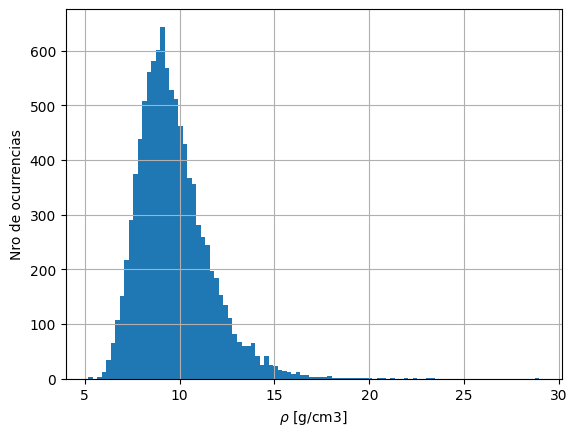

In [104]:
# Graficamos el histograma
plt.figure()
plt.hist(rho_mc, bins=Nbins);

plt.xlabel(r'$\rho$ [g/cm3]')
plt.ylabel('Nro de ocurrencias')
plt.grid(True)

Cuanto vale la varianza obtenida asi y como compara con la estimacion que hicimos previamente?

In [105]:
sigma_rho_propagacion_metodo_monte_carlo = np.std(rho_mc)

In [106]:
print("Sigma via propagacion metodo estandar   :", sigma_rho_propagacion_metodo_estandar)
print("Sigma via propagacion metodo Monte Carlo:", sigma_rho_propagacion_metodo_monte_carlo)

Sigma via propagacion metodo estandar   : 1.6748202583914529
Sigma via propagacion metodo Monte Carlo: 1.8767138686191205


# Continuacion

## Discusion: por qué son (tan) distintas?

## Ventajas y desventajas (discutir entre todos!)